 <center style="padding-top:20px">
    <span style="background:url('https://png.pngtree.com/thumb_back/fw800/background/20231019/pngtree-stunning-space-background-texture-elements-captured-by-nasa-in-high-quality-image_13628509.png');padding:10px; font-size: 3rem; font-weight: bold; color: orange; border-radius:50px; font-family: 'Courier', monospace;">🌺 IRIS SPECIES CLASSIFICATION 💮</span>
</center>

![](https://miro.medium.com/v2/resize:fit:900/1*dol7Xh_c_Zc0C3LhBQ2uyg.jpeg)

 <center style="padding-top:20px">
    <span style="background:url('https://png.pngtree.com/thumb_back/fw800/background/20231019/pngtree-stunning-space-background-texture-elements-captured-by-nasa-in-high-quality-image_13628509.png');padding:10px; font-size: 3rem; font-weight: bold; color: orange; border-radius:50px; font-family: 'Courier', monospace;">🐚 IMPORTING LIBRARIES 🤖</span>
</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import andrews_curves
from skimage import io

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import catboost
import lightgbm
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

 <center style="padding-top:20px">
    <span style="background:url('https://png.pngtree.com/thumb_back/fw800/background/20231019/pngtree-stunning-space-background-texture-elements-captured-by-nasa-in-high-quality-image_13628509.png'); padding:10px; font-size: 3rem; font-weight: bold; color: orange; border-radius:50px; font-family: 'Courier', monospace;">👾 DATA EXPLORATION 🔱</span>
</center>

In [4]:
data = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [5]:
data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
data = data.drop('Id',axis=1)

In [9]:
print("Duplicates",data.duplicated().any())
print(data.isnull().sum())

Duplicates True
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


 <center style="padding-top:20px">
    <span style="background:url('https://png.pngtree.com/thumb_back/fw800/background/20231019/pngtree-stunning-space-background-texture-elements-captured-by-nasa-in-high-quality-image_13628509.png'); padding:10px; font-size: 3rem; font-weight: bold; color: orange; border-radius:50px; font-family: 'Courier', monospace;">🛟 EXPLORATORY DATA ANALYSIS 🧭</span>
</center>

<span style="background:url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTre9D02AZiE6vGn0RZQNGLptVK8sn3dlY5iMvyFs1vg&s');padding:10px; font-size: 3rem; font-weight: bold; color: BLUE; border-radius:50px; font-family: 'Courier', monospace;">🪅 PLOTY PLOTS 🪄</span>


In [10]:
fig = px.scatter_3d(data,x='SepalLengthCm',y='SepalWidthCm',z='PetalLengthCm',color='Species',size_max=18)
fig.show()

In [11]:
fig = px.violin(data,x='Species', y='SepalLengthCm',box=True,points='all',hover_data=data.columns,color='Species')
fig.show()

In [12]:
fig = px.violin(data,y='SepalLengthCm',points='all',hover_data=data.columns,color='Species',violinmode='overlay')
fig.show()

In [13]:
fig = px.sunburst(data, path=['Species','SepalLengthCm','PetalLengthCm'])
fig.show()

In [14]:
fig = px.density_contour(data, x="SepalLengthCm", y="Species")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [15]:
fig = px.scatter(data, 
                 x="SepalWidthCm", 
                 y="SepalLengthCm",
                 color ='Species',
                 size='PetalLengthCm',
                 symbol='Species',
                 marginal_y="violin",
                 marginal_x="box")
fig.show()

<span style="background:url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTre9D02AZiE6vGn0RZQNGLptVK8sn3dlY5iMvyFs1vg&s');padding:10px; font-size: 3rem; font-weight: bold; color: BLUE; border-radius:50px; font-family: 'Courier', monospace;">☠️ SEABORN AND OTHER PLOTS 🎮</span>

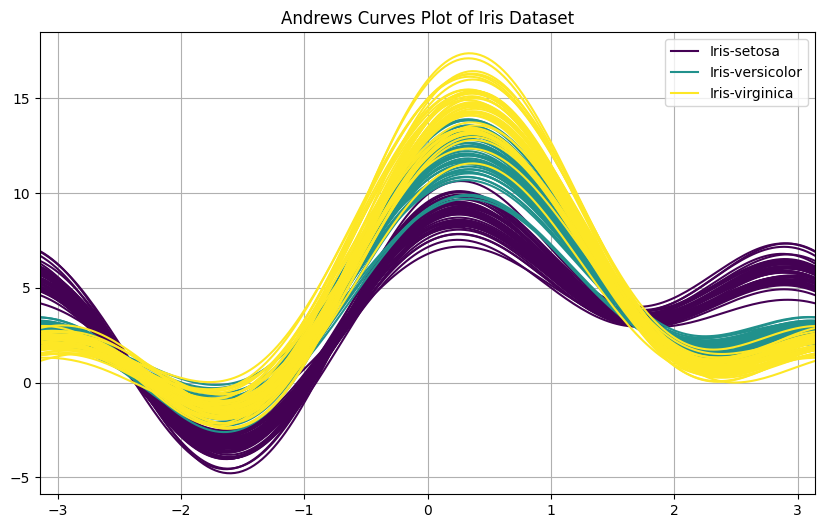

In [16]:
plt.figure(figsize=(10,6))
andrews_curves(data, 'Species', colormap='viridis')
plt.title("Andrews Curves Plot of Iris Dataset")
plt.show()

<Axes: xlabel='Species', ylabel='count'>

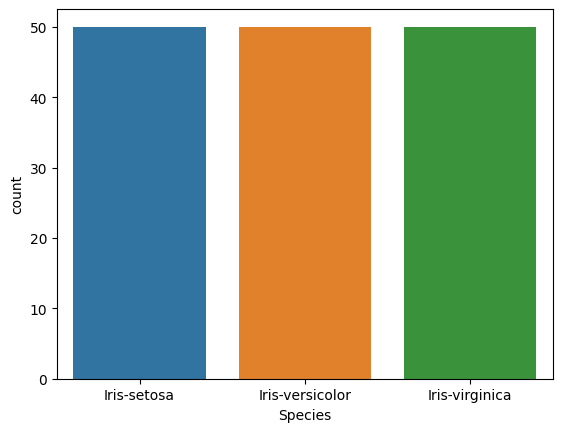

In [17]:
sns.countplot(data,x='Species')

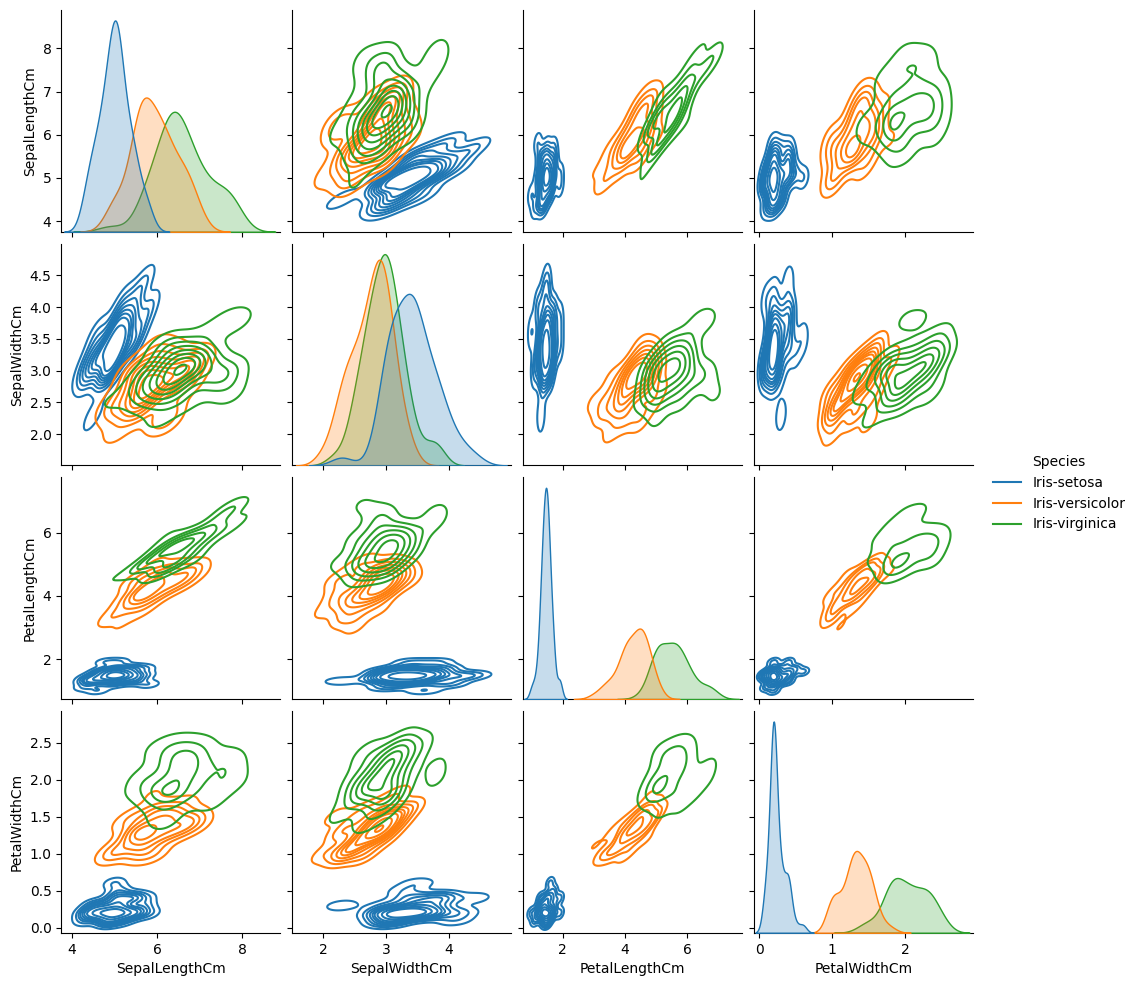

In [18]:
sns.pairplot(data,hue='Species',kind='kde')

<Axes: ylabel='Proportion'>

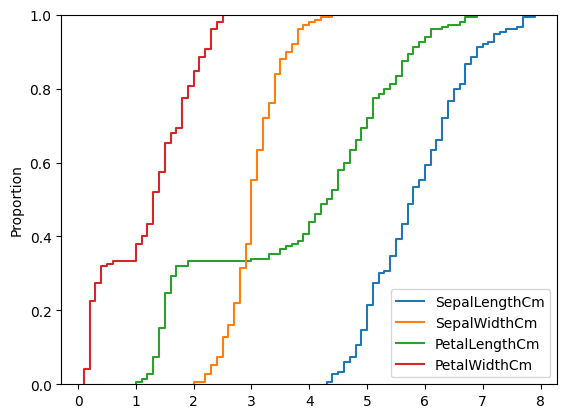

In [19]:
sns.ecdfplot(data)

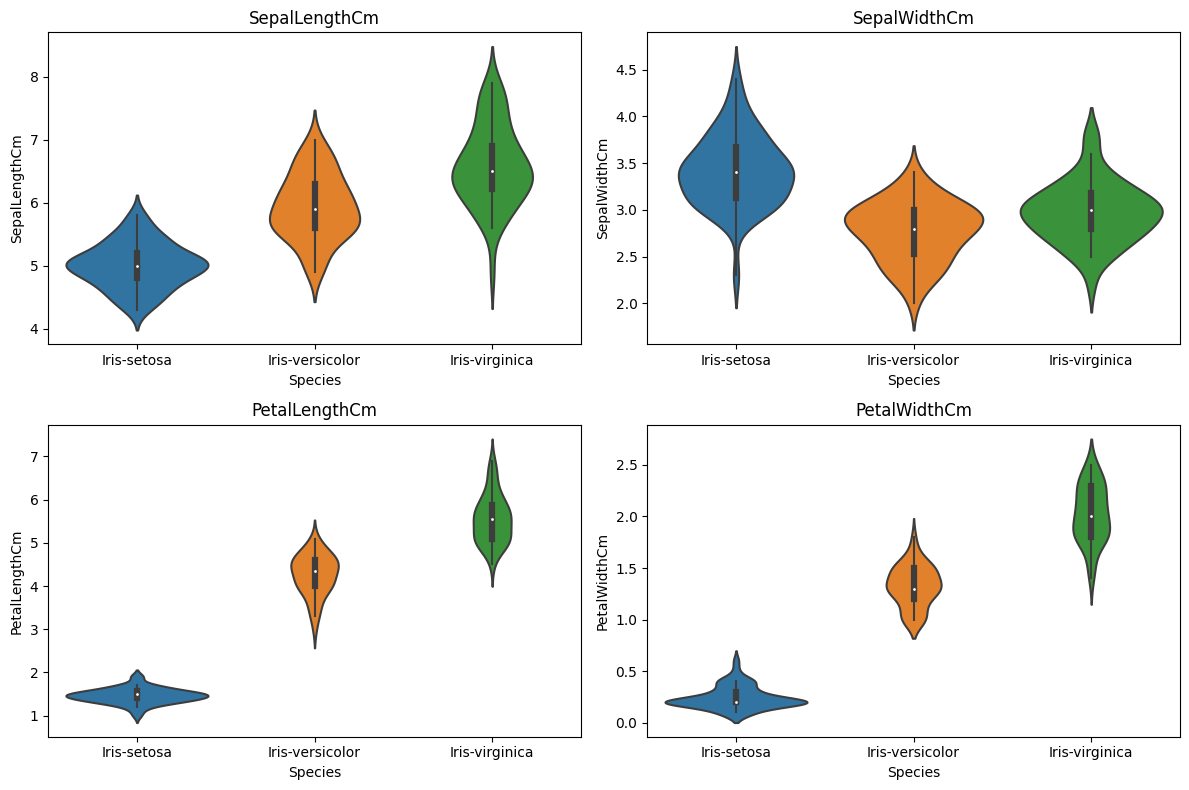

In [20]:
plt.figure(figsize=(12, 8))
n_features = len(data.columns[:-1])
n_rows = n_features // 2 + n_features % 2
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(n_rows, 2, i+1)
    sns.violinplot(x='Species', y=feature, data=data)
    plt.title(feature)
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

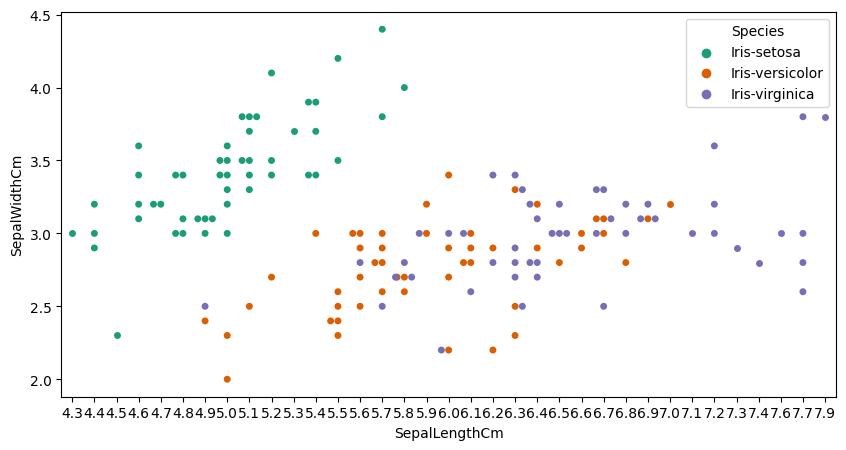

In [21]:
plt.figure(figsize=(10,5))
sns.swarmplot(data ,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='Dark2')
plt.show()

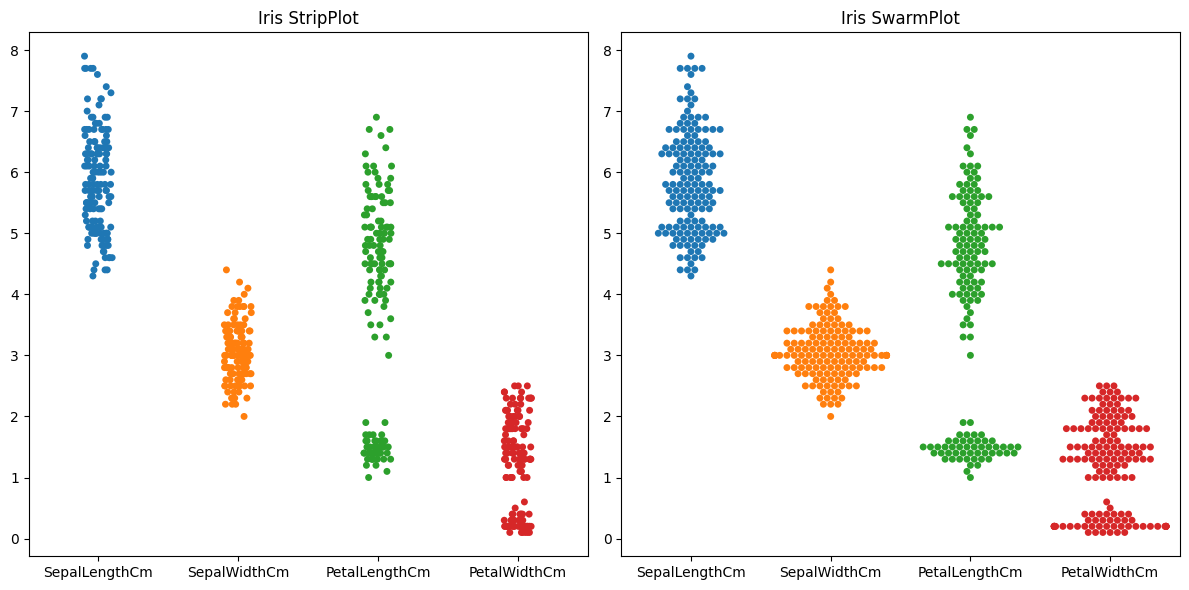

In [22]:
fig,axes = plt.subplots(1,2, figsize=(12,6))
sns.stripplot(data ,ax=axes[0])
axes[0].set_title('Iris StripPlot')
sns.swarmplot(data ,ax=axes[1])
axes[1].set_title('Iris SwarmPlot')
plt.tight_layout()
plt.show()

<Axes: >

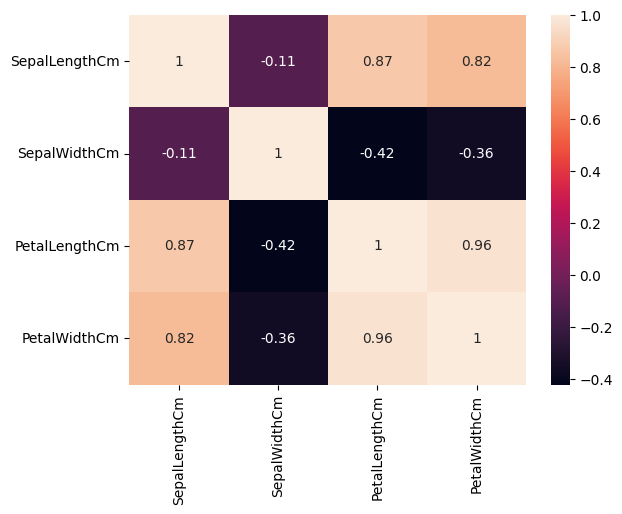

In [23]:
df = data.drop('Species',axis=1)
sns.heatmap(df.corr(),annot=True)

<Axes: >

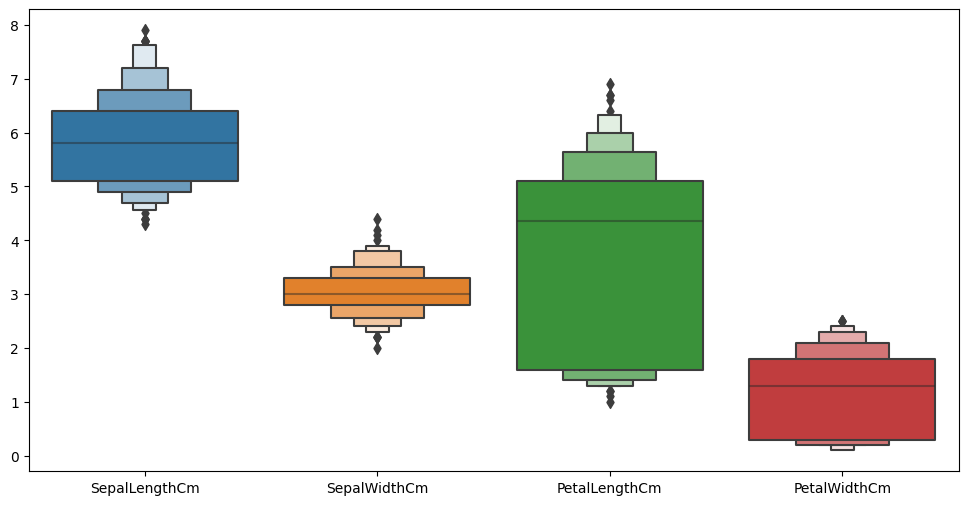

In [24]:
plt.figure(figsize=(12,6))
sns.boxenplot(data)

<Axes: >

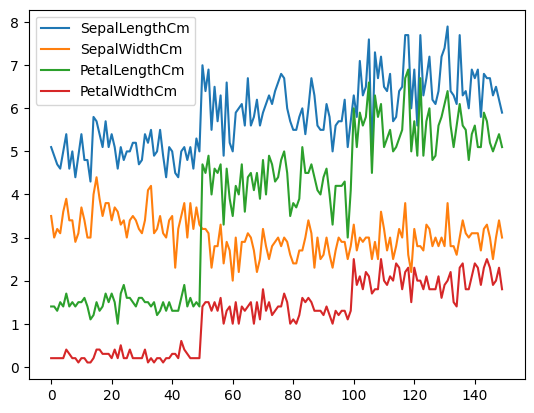

In [25]:
data.plot(kind='line')

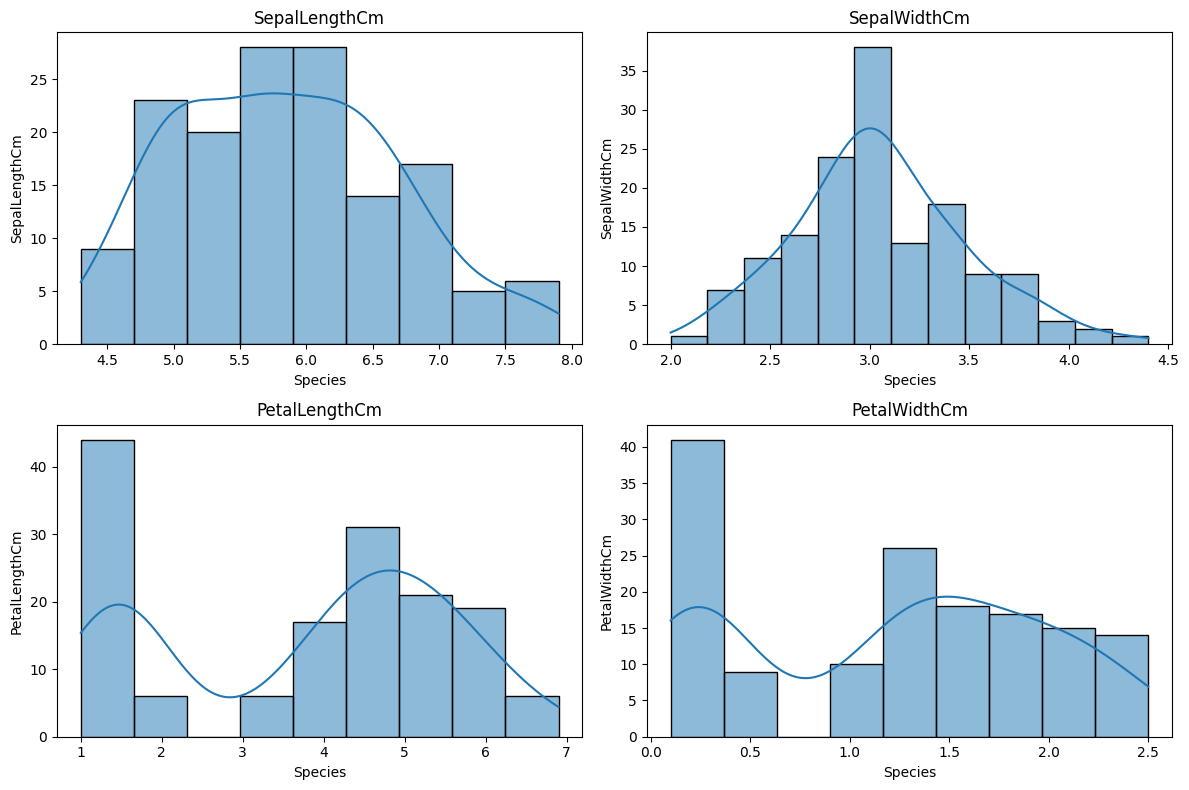

In [26]:
plt.figure(figsize=(12, 8))
n_features = len(data.columns[:-1])
n_rows = n_features // 2 + n_features % 2
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(n_rows, 2, i+1)
    sns.histplot(x=feature, data=data,kde=True)
    plt.title(feature)
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

 <center style="padding-top:20px">
    <span style="background:url('https://png.pngtree.com/thumb_back/fw800/background/20231019/pngtree-stunning-space-background-texture-elements-captured-by-nasa-in-high-quality-image_13628509.png');padding:10px; font-size: 3rem; font-weight: bold; color: orange; border-radius:50px; font-family: 'Courier', monospace;">🚀 FEATURE ENGINEERING 🛸</span>
</center>

In [27]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [28]:
X = data.drop('Species',axis=1)
y= data['Species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

 <center style="padding-top:20px">
    <span style="background:url('https://png.pngtree.com/thumb_back/fw800/background/20231019/pngtree-stunning-space-background-texture-elements-captured-by-nasa-in-high-quality-image_13628509.png'); padding:10px; font-size: 3rem; font-weight: bold; color: orange; border-radius:50px; font-family: 'Courier', monospace;">🚨🏁 CLASSIFICATION MODELS ⚔️🗡️</span>
</center>

<span style="background:url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTre9D02AZiE6vGn0RZQNGLptVK8sn3dlY5iMvyFs1vg&s');padding:10px; font-size: 3rem; font-weight: bold; color: black; border-radius:50px; font-family: 'Courier', monospace;">🏕️ K NEAREST NEIGHBOUS 🌋</span>

In [30]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    pred = KNN.predict(X_test)
    error_rate.append(np.mean(pred !=y_test))

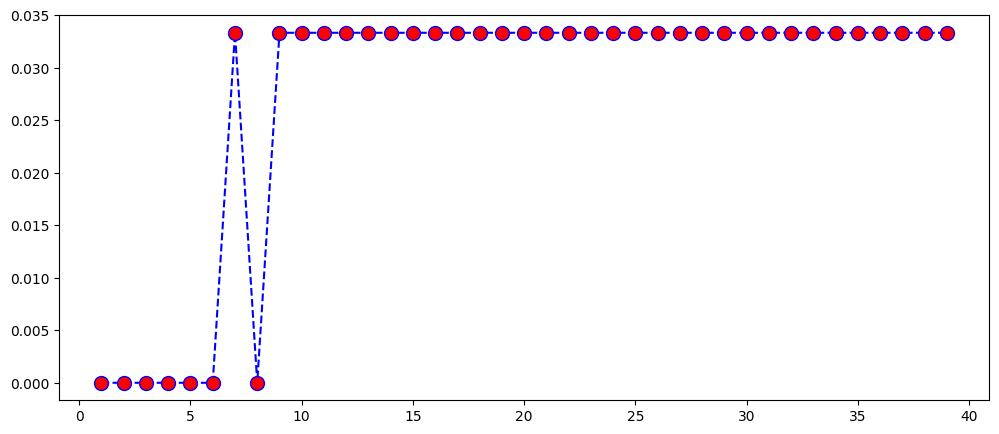

In [31]:
plt.figure(figsize=(12,5))
plt.plot(range(1,40),error_rate,color='blue',markersize=10,markerfacecolor='red',linestyle='dashed',marker='o')

In [32]:
KNN = KNeighborsClassifier(n_neighbors=8,weights='uniform')
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [33]:
KNN_prediction = KNN.predict(X_test)

In [34]:
KNN_accuracy = accuracy_score(y_test,KNN_prediction)
KNN_accuracy

1.0

<Axes: >

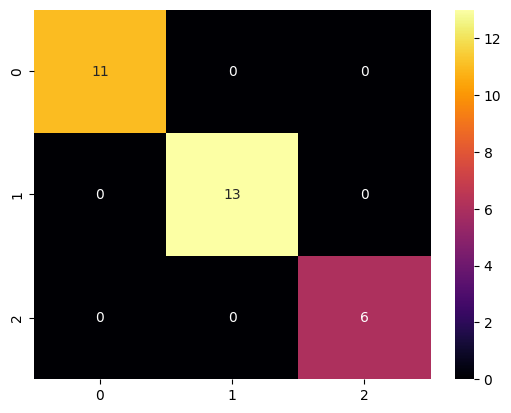

In [35]:
KNN_conf = confusion_matrix(y_test,KNN_prediction)
sns.heatmap(KNN_conf,annot = True, cmap='inferno')

<span style="background:url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTre9D02AZiE6vGn0RZQNGLptVK8sn3dlY5iMvyFs1vg&s');padding:10px; font-size: 3rem; font-weight: bold; color: BLACK; border-radius:50px; font-family: 'Courier', monospace;">⚓ DECISION TREE 🌳</span>

In [36]:
Dtree = DecisionTreeClassifier(criterion='entropy')
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
Dtree_prediction = Dtree.predict(X_test)

In [38]:
Dtree_accuracy = accuracy_score(y_test,Dtree_prediction)
Dtree_accuracy

0.9666666666666667

<Axes: >

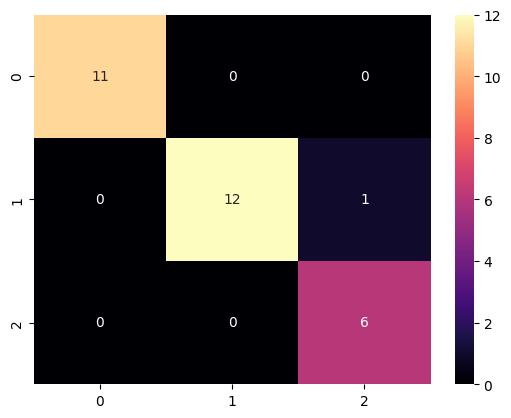

In [39]:
Dtree_conf = confusion_matrix(y_test,Dtree_prediction)
sns.heatmap(Dtree_conf,annot = True, cmap='magma')

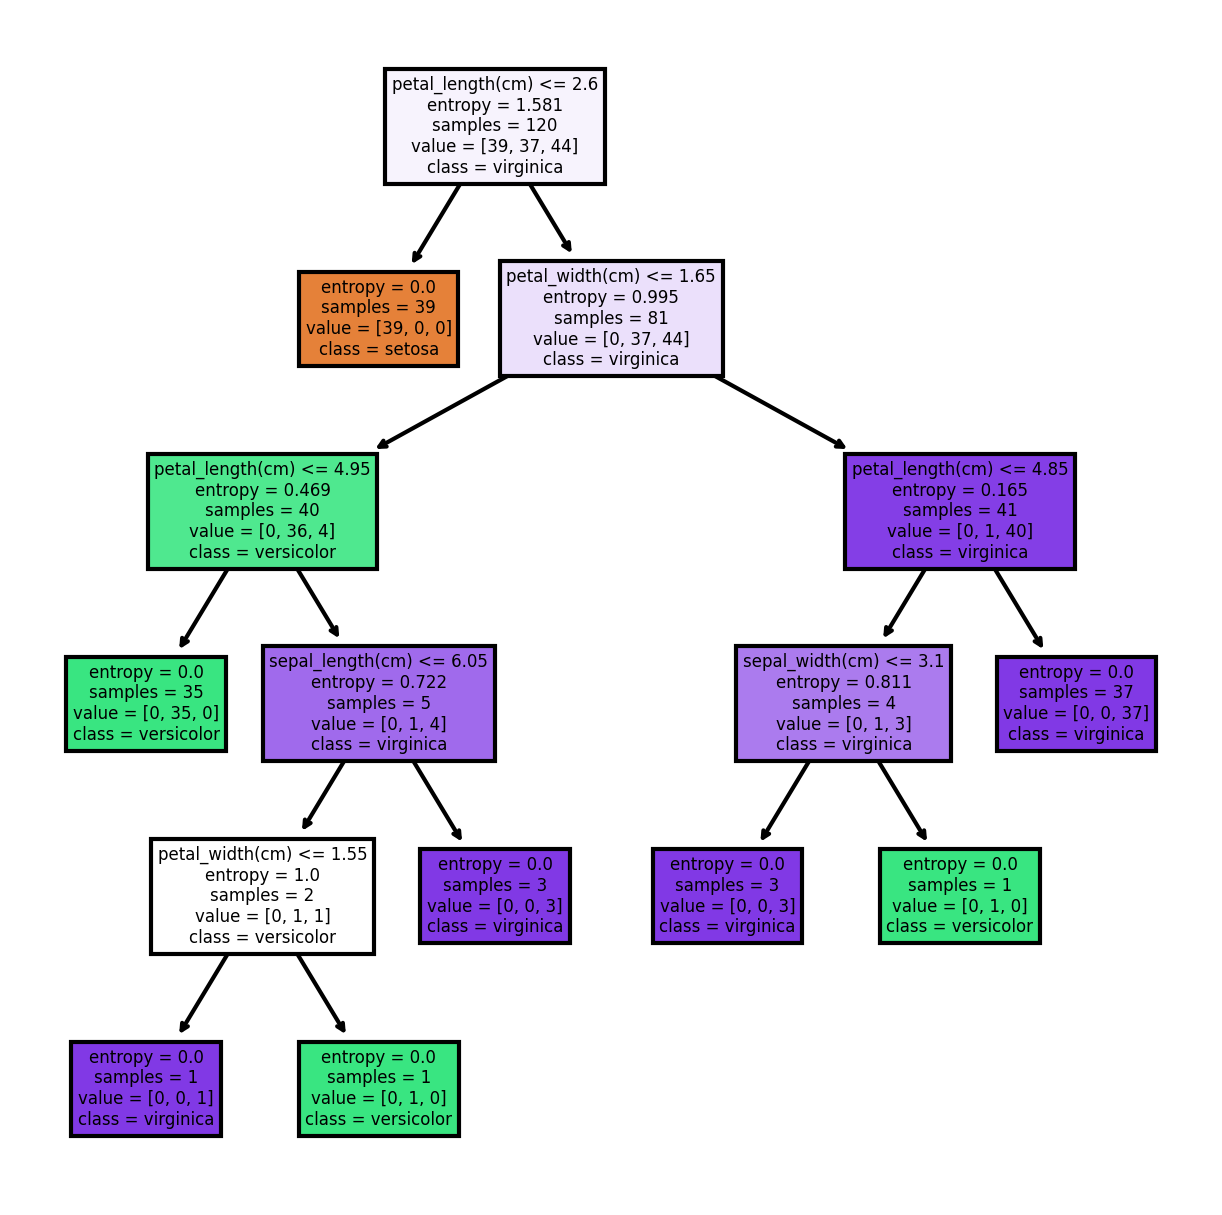

In [40]:
from sklearn import tree
fn =['sepal_length(cm)', 'sepal_width(cm)','petal_length(cm)','petal_width(cm)']
cn =['setosa','versicolor','virginica']
fig,axes = plt.subplots(nrows =1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(Dtree,
               feature_names=fn,
               class_names=cn,
               filled = True);

<span style="background:url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTre9D02AZiE6vGn0RZQNGLptVK8sn3dlY5iMvyFs1vg&s');padding:10px; font-size: 3rem; font-weight: bold; color: BLACK; border-radius:50px; font-family: 'Courier', monospace;">🕸️ LOGISTIC REGRESSION 🦖</span>


In [41]:
Lreg = LogisticRegression(C=100,max_iter=100)
Lreg.fit(X_train,y_train)

LogisticRegression(C=100)

In [42]:
Lreg_prediction = Lreg.predict(X_test)

In [43]:
Lreg_accuracy = accuracy_score(y_test,Lreg_prediction)
Lreg_accuracy

0.9666666666666667

<Axes: xlabel='Species'>

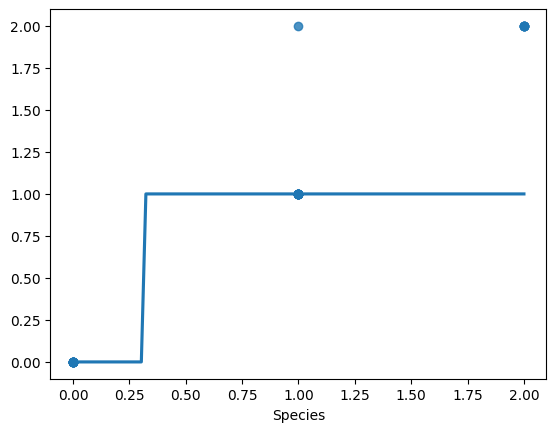

In [44]:
sns.regplot(x=y_test,y=Lreg_prediction,logistic=True,ci=None)

<span style="background:url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTre9D02AZiE6vGn0RZQNGLptVK8sn3dlY5iMvyFs1vg&s');padding:10px; font-size: 3rem; font-weight: bold; color: BLACK; border-radius:50px; font-family: 'Courier', monospace;">💥 CATBOOST 🙀</span>

<Axes: >

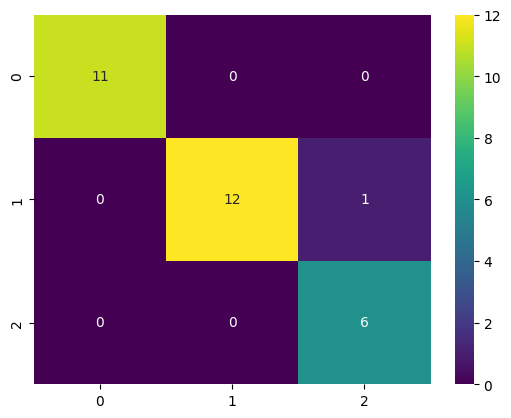

In [45]:
Lreg_conf = confusion_matrix(y_test,Lreg_prediction)
sns.heatmap(Lreg_conf,annot = True, cmap='viridis')

In [46]:
CAT = CatBoostClassifier(learning_rate=0.001)
CAT.fit(X_train,y_train)

0:	learn: 1.0974005	total: 57.9ms	remaining: 57.9s
1:	learn: 1.0962355	total: 58.9ms	remaining: 29.4s
2:	learn: 1.0952455	total: 59.5ms	remaining: 19.8s
3:	learn: 1.0940644	total: 60.1ms	remaining: 15s
4:	learn: 1.0929306	total: 60.6ms	remaining: 12.1s
5:	learn: 1.0917471	total: 61.1ms	remaining: 10.1s
6:	learn: 1.0907184	total: 61.6ms	remaining: 8.74s
7:	learn: 1.0895348	total: 62.1ms	remaining: 7.7s
8:	learn: 1.0882418	total: 62.6ms	remaining: 6.89s
9:	learn: 1.0870698	total: 63.1ms	remaining: 6.24s
10:	learn: 1.0859333	total: 63.5ms	remaining: 5.71s
11:	learn: 1.0849137	total: 64.9ms	remaining: 5.35s
12:	learn: 1.0838320	total: 65.5ms	remaining: 4.97s
13:	learn: 1.0828265	total: 65.9ms	remaining: 4.64s
14:	learn: 1.0816004	total: 66.2ms	remaining: 4.35s
15:	learn: 1.0805548	total: 66.6ms	remaining: 4.09s
16:	learn: 1.0793377	total: 66.9ms	remaining: 3.87s
17:	learn: 1.0782759	total: 67.3ms	remaining: 3.67s
18:	learn: 1.0771319	total: 67.7ms	remaining: 3.49s
19:	learn: 1.0761654	tota

In [47]:
CAT_prediction = CAT.predict(X_test)

In [48]:
cat_accuracy = accuracy_score(y_test,CAT_prediction)
cat_accuracy

0.9666666666666667

<span style="background:url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTre9D02AZiE6vGn0RZQNGLptVK8sn3dlY5iMvyFs1vg&s');padding:10px; font-size: 3rem; font-weight: bold; color: BLACK; border-radius:50px; font-family: 'Courier', monospace;">☀️ LIGHTGBM ☄️</span>

In [49]:
LGM = LGBMClassifier()
LGM.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.176574
[LightGBM] [Info] Start training from score -1.003302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMClassifier()

In [50]:
LGM_prediction = LGM.predict(X_test)

In [51]:
lgm_accuracy = accuracy_score(y_test,LGM_prediction)
lgm_accuracy

0.9666666666666667

 <center style="padding-top:20px">
    <span style="background:url('https://png.pngtree.com/thumb_back/fw800/background/20231019/pngtree-stunning-space-background-texture-elements-captured-by-nasa-in-high-quality-image_13628509.png');padding:10px; font-size: 3rem; font-weight: bold; color: orange; border-radius:50px; font-family: 'Courier', monospace;">🥇 COMAPRISON OF ACCURACIES ☢️♻️</span>
</center>

In [52]:
Z = np.arange(5)
Accuracies =[KNN_accuracy,Dtree_accuracy,Lreg_accuracy,cat_accuracy,lgm_accuracy]

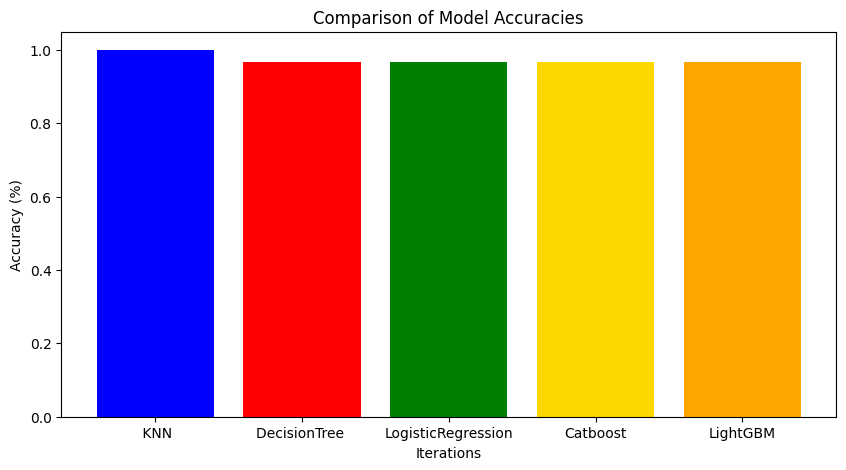

In [53]:
color = ['blue','red','green','gold','orange']
plt.figure(figsize=(10,5))
plt.bar(Z,Accuracies,color=color)
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.xticks(Z, [' KNN', 'DecisionTree ', 'LogisticRegression','Catboost','LightGBM'])
plt.show()

 <center style="padding-top:20px">
    <span style="background:url('https://images.unsplash.com/photo-1619266465172-02a857c3556d?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D');padding:10px; font-size: 3rem; font-weight: bold; color: RED; border-radius:50px; font-family: 'Courier', monospace;">🤜 THANK YOU FOR VISITING 🦉👀</span>
</center>